# Predict the Presence of West-Nile Virus-carrying Mosquitos
## Notebook-2 (Data Exploration)
### Team MossKeyToes

   In this notebook, we explore the Chicago-weather dataset and prepare the data for use in the modeling/analysis.

## Import various code-function libraries and data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.neighbors import KernelDensity

import plotly
import plotly.graph_objs as go

%matplotlib inline

In [4]:
ps_spray = pd.read_csv('../assets/spray.csv')
rt_w_train = pd.read_csv('../assets/rt_weather_train.csv', index_col='Date')

### We load data from the spray dataset and weather-training dataset.

### Let's check the shape of the latter data file that includes both mosquito/virus data and weather data and look at the head of the dataset.

In [5]:
print('The file is organized into',rt_w_train.shape[0], 'rows and', rt_w_train.shape[1], 'columns.')
rt_w_train.head().T

The file is organized into 8475 rows and 21 columns.


Date,2007-05-29,2007-05-29,2007-05-29,2007-05-29,2007-05-29
NumMosquitos,1.000000,1.000000,1.000000,1.000000,4.000000
WnvPresent,0.000000,0.000000,0.000000,0.000000,0.000000
Latitude,41.954690,41.954690,41.994991,41.974089,41.974089
Longitude,-87.800991,-87.800991,-87.769279,-87.824812,-87.824812
Tmax,80.000000,80.000000,80.000000,80.000000,80.000000
Tmin,57.000000,57.000000,57.000000,57.000000,57.000000
Tavg,69.000000,69.000000,69.000000,69.000000,69.000000
DewPoint,56.000000,56.000000,56.000000,56.000000,56.000000
WetBulb,61.000000,61.000000,61.000000,61.000000,61.000000
Sunrise,432.000000,432.000000,432.000000,432.000000,432.000000


### Let's check that our index can be treated as a date:

In [8]:
rt_w_train.index = rt_w_train.index.astype('datetime64')
rt_w_train.index.year.unique()

Int64Index([2007, 2009, 2011, 2013], dtype='int64', name='Date')

In [4]:
max(rt_w_train.index)

'2013-09-26'

### We see above that the only odd-numbered years are represented, up to the end of September in 2013.

## Let's look at the average temperatures by year, then precipitation by year:

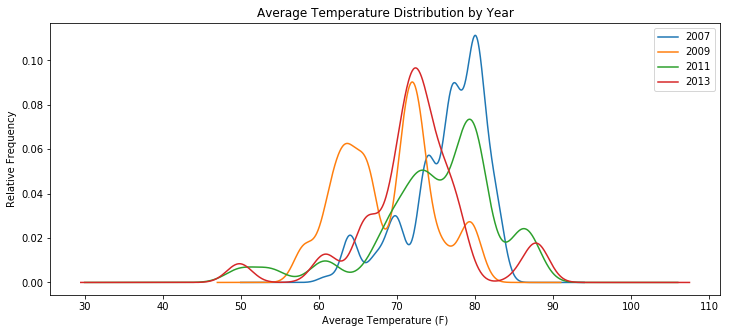

In [46]:
fig = plt.figure(figsize = (12,5))
ps_w_train.groupby(rt_w_train.index.year)['Tavg'].plot(kind = 'kde')
plt.xlabel("Average Temperature (F)")
plt.ylabel('Relative Frequency')
plt.title('Average Temperature Distribution by Year')
plt.legend();

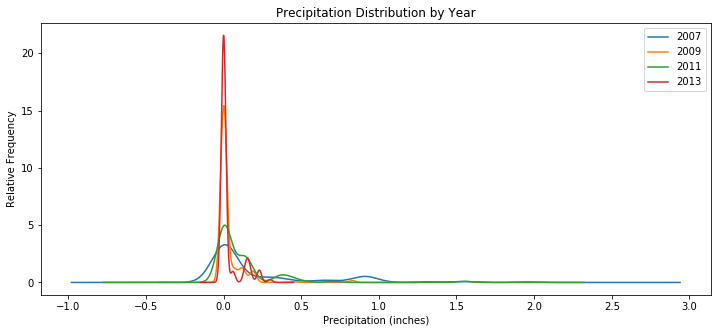

In [45]:
fig = plt.figure(figsize = (12,5))
ps_w_train.groupby(rt_w_train.index.year)['PrecipTotal'].plot(kind = 'kde')
plt.xlabel("Precipitation (inches)")
plt.ylabel('Relative Frequency')
plt.title('Precipitation Distribution by Year')
plt.legend();

### We see some pattern similarity above in alternate odd-years. 
### What about air pressure and wind speed?

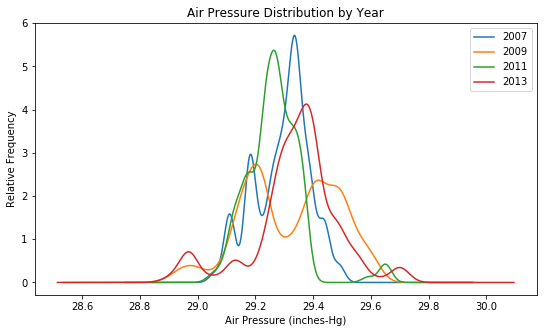

In [34]:
fig = plt.figure(figsize = (9,5))
ps_w_train.groupby(rt_w_train.index.year)['StnPressure'].plot(kind = 'kde')
plt.xlabel("Air Pressure (inches-Hg)")
plt.ylabel('Relative Frequency')
plt.title('Air Pressure Distribution by Year')
plt.legend();

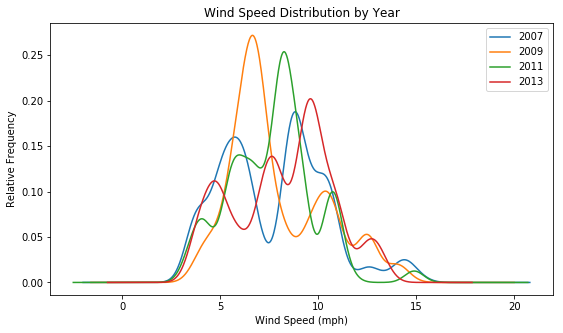

In [35]:
fig = plt.figure(figsize = (9,5))
ps_w_train.groupby(rt_w_train.index.year)['AvgSpeed'].plot(kind = 'kde')
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Relative Frequency')
plt.title('Wind Speed Distribution by Year')
plt.legend();

### For air-pressure and wind speed we see some broad cyclicity with a trough in year 2009 and peaks in years 2007 and 2013.

## Let's look at possible relationships in weather conditions and mosquito concentration for years 2007 and 2011.

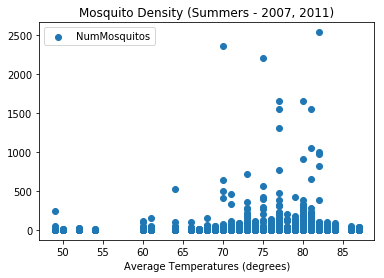

In [38]:
filter1 = (rt_w_train.index.year==2007) | (rt_w_train.index.year==2011)
plt.figure(); plt.scatter(rt_w_train[filter1]['Tavg'], rt_w_train[filter1]['NumMosquitos']); plt.xlabel("Average Temperatures (degrees)");plt.title('Mosquito Density (Summers - 2007, 2011)'); plt.legend()

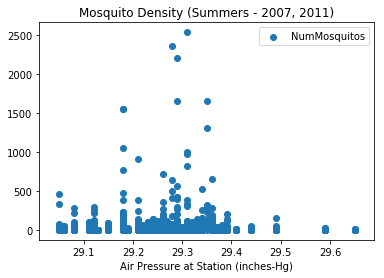

In [37]:
filter1 = (rt_w_train.index.year==2007) | (rt_w_train.index.year==2011)
plt.figure(); plt.scatter(rt_w_train[filter1]['StnPressure'], rt_w_train[filter1]['NumMosquitos']); plt.xlabel("Air Pressure at Station (inches-Hg)");plt.title('Mosquito Density (Summers - 2007, 2011)'); plt.legend()

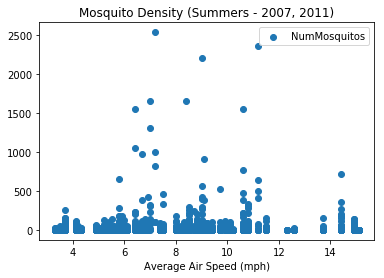

In [39]:
filter1 = (rt_w_train.index.year==2007) | (rt_w_train.index.year==2011)
plt.figure(); plt.scatter(rt_w_train[filter1]['AvgSpeed'], rt_w_train[filter1]['NumMosquitos']); plt.xlabel("Average Air Speed (mph)");plt.title('Mosquito Density (Summers - 2007, 2011)'); plt.legend()

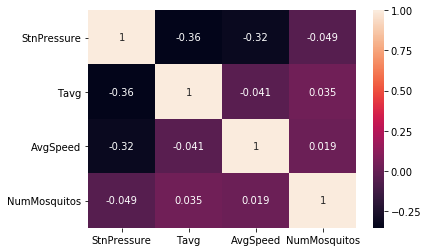

In [41]:
sns.heatmap(rt_w_train[['StnPressure', 
                        'Tavg',
                        'AvgSpeed',
                        'NumMosquitos']].corr(), annot=True)

### The relationships between mosquito concentration and average temperature/wind-speed is postive while the relationship between mosquito concentraion and air-pressure is negative.  All three weather dimensions have a weak correlation with mosquito concentration, if at all.

## We know that mosquitos serve as the vector of the virus from birds to humans.  “Robins are in the sweet spot...they are abundant, mosquitoes like to feed on them, and they happen to support virus infection better than other species.” (https://news.wisc.edu/west-niles-super-spreader-how-about-the-american-robin/).  American robin was the most common source of vertebrate blood for Cx. pipiens (38%) and Cx. restuans (37%) (https://wwwnc.cdc.gov/eid/article/12/3/05-1004_article).
### Let's look at the virus concentration itself and note any relationships.

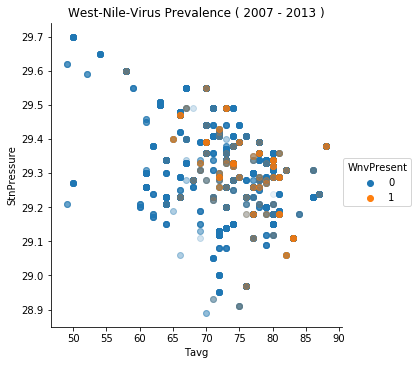

In [6]:
g = sns.lmplot(x='Tavg', y='StnPressure', data=ps_w_train, hue='WnvPresent', scatter_kws={'alpha':0.10}, fit_reg=False)
ax = plt.gca()
ax.set_title("West-Nile-Virus Prevalence ( 2007 - 2013 )")
for lh in g._legend.legendHandles:
    lh.set_alpha(1)

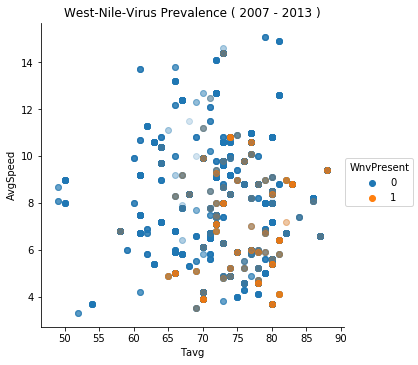

In [50]:
g = sns.lmplot(x='Tavg', y='AvgSpeed', data=ps_w_train, hue='WnvPresent', scatter_kws={'alpha':0.10}, fit_reg=False)
ax = plt.gca()
ax.set_title("West-Nile-Virus Prevalence ( 2007 - 2013 )")
for lh in g._legend.legendHandles:
    lh.set_alpha(1)

###  We also see a weak relationship between weather conditions and the positive incidences of the virus.  If anything, the virus is more prevalent at relatively higher temperatures and pressures and at relatively lower wind-speed conditions. 

## Let turn our attention to the spray data:

In [51]:
print('The file is organized into',ps_spray.shape[0], 'rows and', ps_spray.shape[1], 'columns.')
print(ps_spray.isnull().sum().sum())
ps_spray.head().T

The file is organized into 14835 rows and 4 columns.
584


,0,1,2,3,4
Date,2011-08-29,2011-08-29,2011-08-29,2011-08-29,2011-08-29
Time,6:56:58 PM,6:57:08 PM,6:57:18 PM,6:57:28 PM,6:57:38 PM
Latitude,42.3916,42.3913,42.391,42.3906,42.3904
Longitude,-88.0892,-88.0892,-88.0892,-88.0892,-88.0889


### We see that there are null-values:

In [62]:
ps_spray.isnull().sum()

Time         0
Latitude     0
Longitude    0
dtype: int64

### These nulls are found in the 'Time' feature-column.  Before handling these missing values, let's set our index as DateTime-type.

In [53]:
ps_spray.set_index('Date', inplace=True)
ps_spray.index = pd.to_datetime(ps_spray.index)

In [56]:
print(max(ps_spray.index))
ps_spray.index.year.unique()

2013-09-05 00:00:00


Int64Index([2011, 2013], dtype='int64', name='Date')

### We see that we have two years' worth of spray data, ending at the beginning of September-2013.

### Let's replace the missing values with zeroes:

In [61]:
ps_spray = ps_spray.fillna(0)

## Let's look at the geographic coverage of virus incidence and spraying by year:

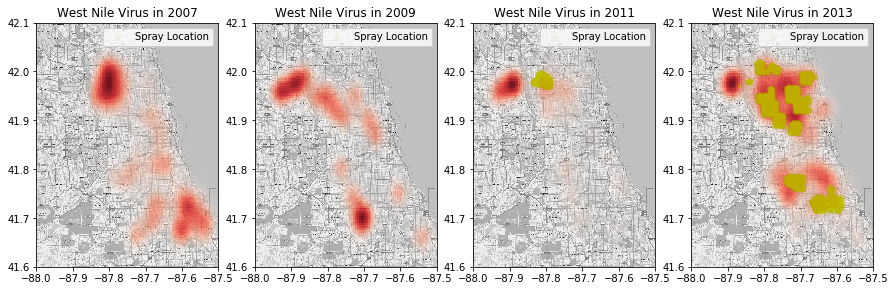

In [58]:
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

fig, axes =plt.subplots(figsize = (15,5),nrows = 1, ncols = 4)

for idx, year in enumerate(rt_w_train.index.year.unique()):

    # Show map in desired lat, long range
    axes[idx].imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.1),
           aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
    
    # Scatter plot for trap locations 
    traps = rt_w_train[['Longitude', 'Latitude']].drop_duplicates().values
    
    # Plot a density map of West-Nile-Virus sighting
    alphas = plt.cm.Reds
    alphas._init()
    alphas._lut[:-3, -1] = abs(np.logspace(0,1,alphas.N) / 10 - 1)[::-1]
    virus_locs = rt_w_train[['Longitude','Latitude']][(rt_w_train['WnvPresent'] == 1) & (rt_w_train.index.year== year)]
    kern = KernelDensity(bandwidth = 0.02)
    kern.fit(virus_locs.values)
    xv, yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(), yv.ravel()]).T
    zv = np.exp(kern.score_samples(gridpoints).reshape(100,100))
    axes[idx].imshow(zv,
               origin = 'lower',
              cmap = alphas,
              extent = (-88, -87.5, 41.6, 42.1),
              aspect = mapdata.shape[0]*1.0/mapdata.shape[1])
    
    # Scatter plot for spray locations (removing outliers far away from the rest of the traps)
    current = ps_spray[ps_spray.index.year==year]
    axes[idx].scatter(current[current['Longitude']>=-88]['Longitude'], 
                      current[current['Latitude']<=42.1]['Latitude'], 
                      marker = '*', 
                      color = 'y', 
                      label = "Spray Location", 
                      alpha=0.05)
    # Labels
    axes[idx].set_title(f"West Nile Virus in {year}")
    axes[idx].legend();

### The code for the visualizations above and below are available courtesy of James Hampton.

### In plotting this spatial data, we found 95 rows in 2011 with locations beyond the 42.1-degree parallel of the mapped area (identified below).

In [57]:
len(ps_spray[(ps_spray.index.year==2011)&(ps_spray['Latitude']>=42.1)])

95

## Let's look at the pattern and timing of the spraying:
### First, for 2011 we can do this with snapshots of West-Nile-virus presence from July through September.

In [107]:
rt_w_t_2011 = rt_w_train[(rt_w_train.index.year==2011) & (rt_w_train.index.month!=6)]
ps_spray_2011 = ps_spray[ps_spray.index.year==2011]

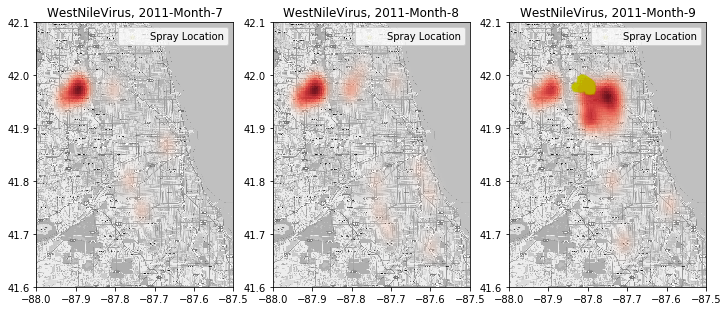

In [106]:
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

fig, axes =plt.subplots(figsize = (12,5),nrows = 1, ncols = 3)

for idx, month in enumerate(rt_w_t_2011.index.month.unique()):

    # Show map in desired lat, long range
    axes[idx].imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.1),
           aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
    
    # Scatter plot for trap locations 
    traps = rt_w_t_2011[['Longitude', 'Latitude']].drop_duplicates().values
    
    # Plot a density map of West-Nile-Virus sighting
    alphas = plt.cm.Reds
    alphas._init()
    alphas._lut[:-3, -1] = abs(np.logspace(0,1,alphas.N) / 10 - 1)[::-1]
    virus_locs = rt_w_t_2011[['Longitude','Latitude']][(rt_w_t_2011['WnvPresent'] == 1) & (rt_w_t_2011.index.month==month)]
    kern = KernelDensity(bandwidth = 0.02)
    kern.fit(virus_locs.values)
    xv, yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(), yv.ravel()]).T
    zv = np.exp(kern.score_samples(gridpoints).reshape(100,100))
    axes[idx].imshow(zv,
               origin = 'lower',
              cmap = alphas,
              extent = (-88, -87.5, 41.6, 42.1),
              aspect = mapdata.shape[0]*1.0/mapdata.shape[1])
    
    # Scatter plot for spray locations (removing outliers far away from the rest of the traps)
    current = ps_spray_2011[ps_spray_2011.index.month==month]
    axes[idx].scatter(current[current['Longitude']>=-88]['Longitude'], 
                      current[current['Latitude']<=42.1]['Latitude'], 
                      marker = '*', 
                      color = 'y', 
                      label = "Spray Location", 
                      alpha=0.05)
    # Labels
    axes[idx].set_title(f"WestNileVirus, 2011-Month-{month}")
    axes[idx].legend();

In [108]:
rt_w_t_2013 = rt_w_train[(rt_w_train.index.year==2013)]
ps_spray_2013 = ps_spray[ps_spray.index.year==2013]

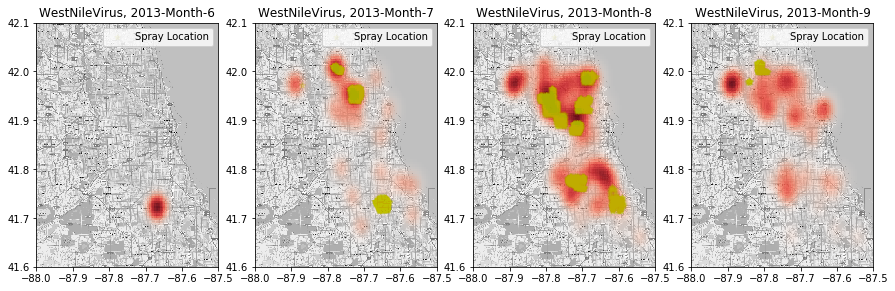

In [105]:
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

fig, axes =plt.subplots(figsize = (15,5),nrows = 1, ncols = 4)  # Four months of data in 2013.

for idx, month in enumerate(rt_w_t_2013.index.month.unique()):  # Loop through each month.

    # 1. Show map in desired lat, long range
    axes[idx].imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.1),
           aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
    
    # 2. Scatter plot for distinct trap locations 
    traps = rt_w_t_2013[['Longitude', 'Latitude']].drop_duplicates().values
    
    # 3. Plot a density map of West-Nile-Virus presnce
    alphas = plt.cm.Reds
    alphas._init()
    alphas._lut[:-3, -1] = abs(np.logspace(0,1,alphas.N) / 10 - 1)[::-1]
    virus_locs = rt_w_t_2013[['Longitude','Latitude']][(rt_w_t_2013['WnvPresent'] == 1) & (rt_w_t_2013.index.month==month)]
    kern = KernelDensity(bandwidth = 0.02)
    kern.fit(virus_locs.values)
    xv, yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(), yv.ravel()]).T
    zv = np.exp(kern.score_samples(gridpoints).reshape(100,100))
    axes[idx].imshow(zv,
               origin = 'lower',
              cmap = alphas,
              extent = (-88, -87.5, 41.6, 42.1),
              aspect = mapdata.shape[0]*1.0/mapdata.shape[1])
    
    # 4. Scatter plot for spray locations (limited to spraying south of 42.1-degrees latitude)
    current = ps_spray_2013[ps_spray_2013.index.month==month]
    axes[idx].scatter(current[current['Longitude']>=-88]['Longitude'], 
                      current[current['Latitude']<=42.1]['Latitude'], 
                      marker = '*', 
                      color = 'y', 
                      label = "Spray Location", 
                      alpha=0.05)
    # Subplot labels
    axes[idx].set_title(f"WestNileVirus, 2013-Month-{month}")
    axes[idx].legend();

### We the spraying in the south of Chicago in July-2013 as seemingly a response to an incidence of the virus in June.  There would understandably be a lead-time between collecting traps and determining the presence of the virus, as well as scheduling the spraying.
## Let's take a closer look at July-2013, then August, to check if this lead-time applies there:

In [121]:
rt_w_t_2013_July = rt_w_train[(rt_w_train.index.year==2013) & (rt_w_train.index.month==7)]
ps_spray_2013_July = ps_spray[(ps_spray.index.year==2013) & (ps_spray.index.month==7)]

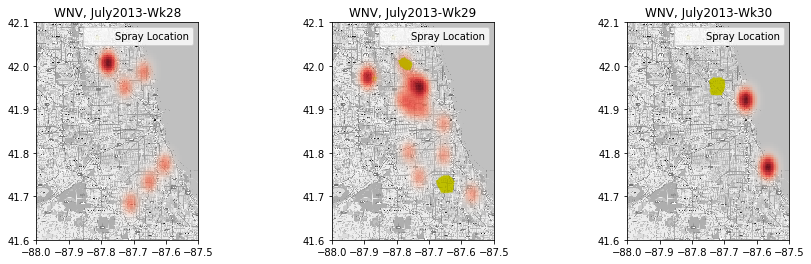

In [124]:
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

fig, axes =plt.subplots(figsize = (15,4),nrows = 1, ncols = 3)  # There are 3 separate weeks in August-2013.

for idx, week in enumerate(rt_w_t_2013_July.index.week.unique()):   # Loop through each weekly period.

    # 1. Show map in desired lat, long range
    axes[idx].imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.1),
           aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
    
    # 2. Scatter plot for distinct trap locations:
    traps = rt_w_t_2013_July[['Longitude', 'Latitude']].drop_duplicates().values
    
    # 3. Plot a density map of West-Nile-Virus presence
    alphas = plt.cm.Reds
    alphas._init()
    alphas._lut[:-3, -1] = abs(np.logspace(0,1,alphas.N) / 10 - 1)[::-1]
    virus_locs = rt_w_t_2013_July[['Longitude','Latitude']][(rt_w_t_2013_July['WnvPresent'] == 1) & (rt_w_t_2013_July.index.week==week)]
    kern = KernelDensity(bandwidth = 0.02)
    kern.fit(virus_locs.values)
    xv, yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(), yv.ravel()]).T
    zv = np.exp(kern.score_samples(gridpoints).reshape(100,100))
    axes[idx].imshow(zv,
               origin = 'lower',
              cmap = alphas,
              extent = (-88, -87.5, 41.6, 42.1),
              aspect = mapdata.shape[0]*1.0/mapdata.shape[1])
    
    # 4. Scatter plot for spray locations (limited to spraying south of 42.1-degrees latitude)
    current = ps_spray_2013_July[ps_spray_2013_July.index.week==week]
    axes[idx].scatter(current[current['Longitude']>=-88]['Longitude'], 
                      current[current['Latitude']<=42.1]['Latitude'], 
                      marker = '*', 
                      color = 'y', 
                      label = "Spray Location", 
                      alpha=0.05)
    # Subplot labels:
    axes[idx].set_title(f"WNV, July2013-Wk{week}")
    axes[idx].legend();

### We see the spraying starting in mid-July in response to a presence of the virus in the south of Chicago in June, as well as a response to its presence near the airport in Week-28.  In Week-30 there is a clear lag due to the presence in the upper-center part of the mapped area.

In [112]:
rt_w_t_2013_Aug = rt_w_train[(rt_w_train.index.year==2013) & (rt_w_train.index.month==8)]
ps_spray_2013_Aug = ps_spray[(ps_spray.index.year==2013) & (ps_spray.index.month==8)]

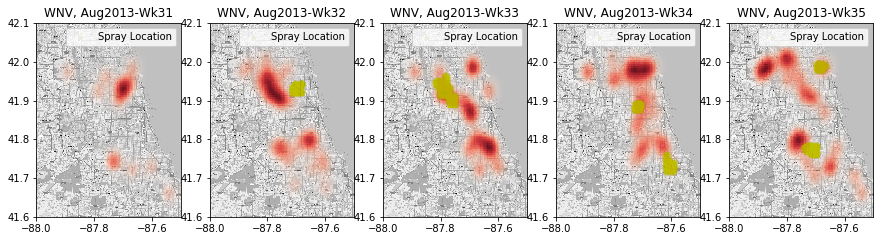

In [120]:
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

fig, axes =plt.subplots(figsize = (15,4),nrows = 1, ncols = 5)  # There are 5 separate weeks in August-2013.

for idx, week in enumerate(rt_w_t_2013_Aug.index.week.unique()):   # Loop through each weekly period.

    # 1. Show map in desired lat, long range
    axes[idx].imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.1),
           aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
    
    # 2. Scatter plot for distinct trap locations:
    traps = rt_w_t_2013_Aug[['Longitude', 'Latitude']].drop_duplicates().values
    
    # 3. Plot a density map of West-Nile-Virus presence
    alphas = plt.cm.Reds
    alphas._init()
    alphas._lut[:-3, -1] = abs(np.logspace(0,1,alphas.N) / 10 - 1)[::-1]
    virus_locs = rt_w_t_2013_Aug[['Longitude','Latitude']][(rt_w_t_2013_Aug['WnvPresent'] == 1) & (rt_w_t_2013_Aug.index.week==week)]
    kern = KernelDensity(bandwidth = 0.02)
    kern.fit(virus_locs.values)
    xv, yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(), yv.ravel()]).T
    zv = np.exp(kern.score_samples(gridpoints).reshape(100,100))
    axes[idx].imshow(zv,
               origin = 'lower',
              cmap = alphas,
              extent = (-88, -87.5, 41.6, 42.1),
              aspect = mapdata.shape[0]*1.0/mapdata.shape[1])
    
    # 4. Scatter plot for spray locations (limited to spraying south of 42.1-degrees latitude)
    current = ps_spray_2013_Aug[ps_spray_2013_Aug.index.week==week]
    axes[idx].scatter(current[current['Longitude']>=-88]['Longitude'], 
                      current[current['Latitude']<=42.1]['Latitude'], 
                      marker = '*', 
                      color = 'y', 
                      label = "Spray Location", 
                      alpha=0.05)
    # Subplot labels:
    axes[idx].set_title(f"WNV, Aug2013-Wk{week}")
    axes[idx].legend();

### We see a lag in the spraying by a week from Week-31 to Week-34.  In Week-35, the spraying in the south part of Chicago may have been closer to anticipatory.

## In summary, we explored the weather relationships in our data in the time dimension to see possible cyclicity patterns.  We also tried to show the relationship of weather conditions to the concentration of mosquitos and the presence of the virus.  Lastly, we explored the schedule of spraying on a yearly, monthly and weekly level to show the reactionary effort to address the presence of the virus.

## Next Step:

   With a better understanding of the feature and spatial relationships, we are able to plan and design our modeling strategies.

# Continued on Notebook-3 (Modeling)...

### In the modeling section, we apply our understanding of the temporal-data relationships with various modeling techniques to suggest a production model based on logistic regression and to evaluate the thresholds with which to optimize predictive errors.